### 將資料以指定格式讀入

In [1]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff("../hypothyroid_modified_cjlin.arff")
data = pd.DataFrame(data[0])
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,Class
0,41.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.30,2.5,125.0,1.14,109.0,b'SVHC',b'negative'
1,23.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',4.10,2.0,102.0,1.00,106.0,b'other',b'negative'
2,46.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.98,1.7,109.0,0.91,120.0,b'other',b'negative'
3,70.0,b'F',b't',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.16,1.9,175.0,1.00,106.0,b'other',b'negative'
4,70.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.72,1.2,61.0,0.87,70.0,b'SVI',b'negative'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',8.80,2.7,108.0,1.11,97.0,b'other',b'compensated_hypothyroid'
3394,68.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',1.00,2.1,124.0,1.08,114.0,b'SVI',b'negative'
3395,74.0,b'F',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',5.10,1.8,112.0,1.07,105.0,b'other',b'negative'
3396,72.0,b'M',b'f',b'f',b'f',b'f',b'f',b'f',b'f',b'f',...,b'f',b'f',b'f',0.70,2.0,82.0,0.94,87.0,b'SVI',b'negative'


### 將資料以指定格式讀入

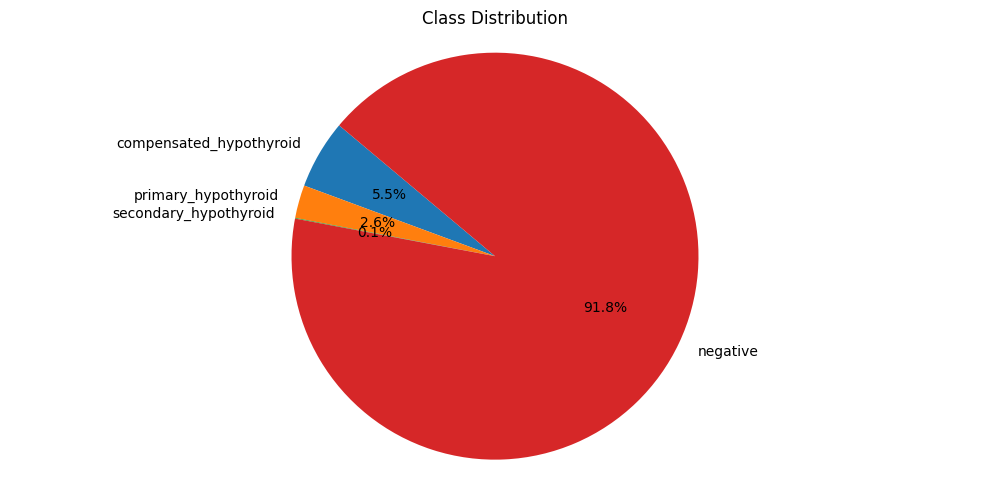

In [2]:
import matplotlib.pyplot as plt
ansType = {cls: 0 for cls in set(data["Class"])}
total = 0
for cls in data["Class"]:
    ansType[cls] += 1
    total += 1
    
# 將字串百分比轉成數值以便畫圖
labels = [key.decode() if isinstance(key, bytes) else str(key) for key in ansType.keys()]
values = [float(val) for val in ansType.values()]

# 畫出圓餅圖
plt.figure(figsize=(10, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()

### 資料轉成one-hot-encoding，切分資料(4:1)

In [3]:
from sklearn.model_selection import train_test_split

# one-hot-encoding
data = pd.get_dummies(data)

# x is features of result, y represent result collection
x = data.iloc[:,0:-4]
y = data.iloc[:,-4:]
# x, y _train are data used to training, x, y _test are used to test training of ML result
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2, random_state=42)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

data

,age,TSH,T3,TT4,T4U,FTI,sex_b'F',sex_b'M',on thyroxine_b'f',on thyroxine_b't',...,psych_b't',referral source_b'STMW',referral source_b'SVHC',referral source_b'SVHD',referral source_b'SVI',referral source_b'other',Class_b'compensated_hypothyroid',Class_b'negative',Class_b'primary_hypothyroid',Class_b'secondary_hypothyroid'
0,41.0,1.30,2.5,125.0,1.14,109.0,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
1,23.0,4.10,2.0,102.0,1.00,106.0,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,46.0,0.98,1.7,109.0,0.91,120.0,False,True,True,False,...,False,False,False,False,False,True,False,True,False,False
3,70.0,0.16,1.9,175.0,1.00,106.0,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
4,70.0,0.72,1.2,61.0,0.87,70.0,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,19.0,8.80,2.7,108.0,1.11,97.0,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False
3394,68.0,1.00,2.1,124.0,1.08,114.0,True,False,True,False,...,False,False,False,False,True,False,False,True,False,False
3395,74.0,5.10,1.8,112.0,1.07,105.0,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
3396,72.0,0.70,2.0,82.0,0.94,87.0,False,True,True,False,...,False,False,False,False,True,False,False,True,False,False


### 建立 Transformer model

In [6]:
import tensorflow as tf
from tensorflow.keras import layers

# 定義 Transformer Encoder Block
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation='relu'),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# 建立模型
input_layer = layers.Input(shape=(41, 1)) # 41 characters

# 線性升維（將原本的特徵轉成可處理的 embedding 向量）
x = layers.Dense(64)(input_layer)

# 加入 Transformer Block
x = TransformerEncoder(embed_dim=64, num_heads=4, ff_dim=128)(x)
x = layers.Dropout(0.3)(x)

# 聚合整體序列資訊
x = layers.GlobalAveragePooling1D()(x)

x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 41, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 41, 64)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_encoder_2           │ (None, 41, 64)         │        83,200 │
│ (TransformerEncoder)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 41, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,748 (342.77 KB)

 Trainable params: 87,748 (342.77 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Using 0.001 as learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.metrics.CategoricalAccuracy(name='accuracy')])

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
# If "loss" consecutive till 10 time, stop to avoid overfitting
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


x_train1 = np.asarray(x_train, dtype=K.floatx())
y_train1 = np.asarray(y_train, dtype=K.floatx())
x_test1  = np.asarray(x_test,  dtype=K.floatx())
y_test1  = np.asarray(y_test,  dtype=K.floatx())

# To fit CNN model, change dimention of data
x_train1 = x_train1.reshape((-1, 41, 1))
x_test1 = x_test1.reshape((-1, 41, 1))

# epochs=400：最多訓練 400 個 epoch
# batch_size=20：每次訓練用 20 筆資料計算一次梯度更新
# validation_data：指定測試集作為驗證資料，用來評估每一輪的效能
# verbose=1：每個 epoch 顯示訓練進度條與評估指標
# callbacks=[earlyStopping]：若 loss 沒改善，會自動中止訓練以避免過度訓練
history = model.fit(
    x_train1,
    y_train1,
    epochs=400,
    batch_size=20,
    validation_data=(x_test1, y_test1),
    verbose=1,
    callbacks=[earlyStopping]
)

Epoch 1/400


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8620 - loss: 0.5183 - val_accuracy: 0.9382 - val_loss: 0.2600
Epoch 2/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9077 - loss: 0.4080 - val_accuracy: 0.9382 - val_loss: 0.2257
Epoch 3/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9133 - loss: 0.3416 - val_accuracy: 0.9426 - val_loss: 0.2443
Epoch 4/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9205 - loss: 0.2720 - val_accuracy: 0.9382 - val_loss: 0.2395
Epoch 5/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9079 - loss: 0.2996 - val_accuracy: 0.9397 - val_loss: 0.1798
Epoch 6/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9059 - loss: 0.2715 - val_accuracy: 0.9441 - val_loss: 0.1693
Epoch 7/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9267 - loss: 0.2426 - val_accuracy: 0.9412 - val_loss: 0.1923
Epoch 8/400
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9163 - loss: 0.2601 - val_accuracy: 0.942

In [9]:
history_dict = history.history
acc = history_dict['accuracy']         # 訓練集準確率
val_acc = history_dict['val_accuracy'] # 驗證集準確率
loss = history_dict['loss']            # 訓練集損失
val_loss = history_dict['val_loss']    # 驗證集損失
epochs = range(1, len(acc) + 1)

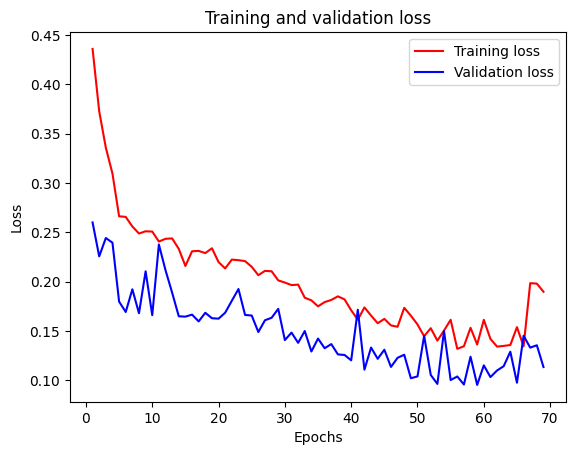

In [10]:
import matplotlib.pyplot as plt
plt.plot(epochs, loss, 'r', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

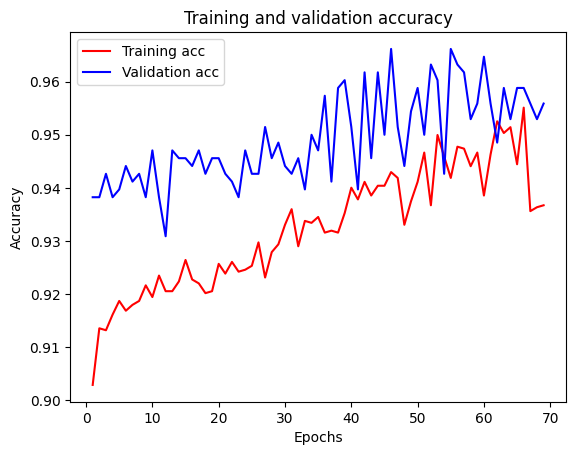

In [11]:
plt.clf() # clean current figure
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
model.evaluate(x_test1, y_test1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9478 - loss: 0.1083


[0.0954483225941658, 0.9558823704719543]